In [1]:
# CODE TO SEGREGATE BETWEEN IMAGES AND PDFS

import os
import glob
import shutil

source_folder = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\lab reports samples\\samples of urine tests'  # Specify the path to the source folder
pdf_folder = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\samples of urine tests\\img'  # Specify the path to the PDF folder

# Create the destination folder if it doesn't exist
if not os.path.exists(pdf_folder):
    os.makedirs(pdf_folder)

# Recursive directory traversal
for root, dirs, files in os.walk(source_folder):
    for file in files:
        file_path = os.path.join(root, file)  # Get the full path of the file
        if file.lower().endswith('.jpg'):  # Check if it's a PDF file
            # Move the PDF file to the PDF folder
            shutil.move(file_path, os.path.join(pdf_folder, file))


In [ ]:
# extract text from images and store them in a separate text file created for each image with the same name

import os
import pytesseract as p
from PIL import Image

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\Comprehensive Metabolic Panel'
folder_path2 = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\Comprehensive Metabolic Panel txt'


for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.png')):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        text = p.image_to_string(image)
        
        # Create a text file with the same name as the image
        text_file_name = os.path.splitext(filename)[0] + '.txt'
        text_file_path = os.path.join(folder_path2, text_file_name)
        
        with open(text_file_path, 'w', encoding='utf-8') as file:
            file.write(text)


In [ ]:
#pip install pdfminer.six

In [ ]:
import os
from pdfminer.high_level import extract_text

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\data\\Womens Health\\Spinal Muscular Atrophy SMA'
folder_path2 = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\data\\Womens Health\Spinal Muscular Atrophy SMA'

for filename in os.listdir(folder_path):
    if filename.endswith('.pdf'):
        file_path = os.path.join(folder_path, filename)
        
        try:
            text = extract_text(file_path)
        except Exception as e:
            print(f"Error extracting text from {filename}: {str(e)}")
            continue
        
        # Create a text file with the same name as the PDF file
        text_file_name = os.path.splitext(filename)[0] + '.txt'
        text_file_path = os.path.join(folder_path2, text_file_name)
        
        with open(text_file_path, 'w', encoding='utf-8') as file:
            file.write(text)
            
        print(f"Text extracted from {filename} and saved to {text_file_path}")


# OTHER LAB REPORTS

In [1]:
#READ INDIVIDUAL FILES AND ADD THEM TO A DATAFRAME

In [260]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\other lab reports txt'  # Replace with the actual folder path

others_data=[]

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read()
            others_data.append(text)


In [261]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = others_data  
data1 = []
data1.extend([1] * len(data2))

o_df = pd.DataFrame(columns=['Label', 'Text'])
o_df['Label'] = data1
o_df['Text'] = data2


# PREPROCESSING

In [262]:
# REMOVE LINE BREAKS

import pandas as pd

o_df['Text'] = o_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)


In [263]:
import pandas as pd

o_df['Text'] = o_df['Text'].apply(lambda x: x.lower())


In [264]:
# REMOVE EMAIL IDS

import re

def email(text):
    pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    text_without_emails = re.sub(pattern, '', text)
    return text_without_emails

o_df['Text'] = o_df['Text'].apply(email)


In [265]:
# REMOVE URLS

import re

def url(text):
    url_pattern = re.compile(r"http[s]?://\S+|www\.\S+")
    text_without_urls = re.sub(url_pattern, '', text) 
    return text_without_urls

o_df['Text'] = o_df['Text'].apply(url)


In [266]:
# REMOVE SPECIAL CHARACTERS

import re
def sc(text):
    text_after_removal = re.sub(r'[^a-zA-Z0-9\s]', ' ', text) #special charecters were removed
    return text_after_removal

o_df['Text'] = o_df['Text'].apply(sc)

In [267]:
# REMOVE STOPWORDS

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def sw(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

o_df['Text'] = o_df['Text'].apply(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# BLOOD TEST REPORTS

In [268]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\samples of blood tests txt'  # Replace with the actual folder path

blood_data=[]

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read()
            blood_data.append(text)


In [269]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = blood_data  
data1 = []
data1.extend([2] * len(data2))

b_df = pd.DataFrame(columns=['Label', 'Text'])
b_df['Label'] = data1
b_df['Text'] = data2


In [270]:
b_df['Text'] = b_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [271]:
b_df['Text'] = b_df['Text'].apply(lambda x: x.lower())

In [272]:
b_df['Text'] = b_df['Text'].apply(email)

In [273]:
b_df['Text'] = b_df['Text'].apply(url)

In [274]:
b_df['Text'] = b_df['Text'].apply(sc)

In [275]:
b_df['Text'] = b_df['Text'].apply(sw)

# HAEMATOLOGY REPORTS

In [276]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\samples of hematology reports txt'  # Replace with the actual folder path

haematology_data=[]

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read()
            haematology_data.append(text)


In [277]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = haematology_data  
data1 = []
data1.extend([3] * len(data2))

h_df = pd.DataFrame(columns=['Label', 'Text'])
h_df['Label'] = data1
h_df['Text'] = data2


In [278]:
h_df['Text'] = h_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [279]:
h_df['Text'] = h_df['Text'].apply(lambda x: x.lower())

In [280]:
h_df['Text'] = h_df['Text'].apply(email)

In [281]:
h_df['Text'] = h_df['Text'].apply(url)

In [282]:
h_df['Text'] = h_df['Text'].apply(sc)

In [283]:
h_df['Text'] = h_df['Text'].apply(sw)

# TUMOR MARKERS 

In [284]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\samples of tumor markers txt'  # Replace with the actual folder path

tumor_data=[]

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read()
            tumor_data.append(text)


In [285]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = tumor_data  
data1 = []
data1.extend([4] * len(data2))

t_df = pd.DataFrame(columns=['Label', 'Text'])
t_df['Label'] = data1
t_df['Text'] = data2


In [286]:
t_df['Text'] = t_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [287]:
t_df['Text'] = t_df['Text'].apply(lambda x: x.lower())

In [288]:
t_df['Text'] = t_df['Text'].apply(email)

In [289]:
t_df['Text'] = t_df['Text'].apply(url)

In [290]:
t_df['Text'] = t_df['Text'].apply(sc)

In [291]:
t_df['Text'] = t_df['Text'].apply(sw)

# URINE TESTS

In [292]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\samples of urine tests txt'  # Replace with the actual folder path

urine_data=[]

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            text = file.read()
            urine_data.append(text)


In [293]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = urine_data  
data1 = []
data1.extend([5] * len(data2))

u_df = pd.DataFrame(columns=['Label', 'Text'])
u_df['Label'] = data1
u_df['Text'] = data2


In [294]:
u_df['Text'] = u_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [295]:
u_df['Text'] = u_df['Text'].apply(lambda x: x.lower())

In [296]:
u_df['Text'] = u_df['Text'].apply(email)

In [297]:
u_df['Text'] = u_df['Text'].apply(url)

In [298]:
u_df['Text'] = u_df['Text'].apply(sc)

In [299]:
u_df['Text'] = u_df['Text'].apply(sw)

# COMPREHENSIVE METABOLIC PANEL

In [300]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\Comprehensive Metabolic Panel txt'  

Comprehensive_Metabolic_Panel_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            Comprehensive_Metabolic_Panel_data.append(text)

In [301]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = Comprehensive_Metabolic_Panel_data  
data1 = []
data1.extend([6] * len(data2))

c_df = pd.DataFrame(columns=['Label', 'Text'])
c_df['Label'] = data1
c_df['Text'] = data2


In [302]:
c_df['Text'] = c_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [303]:
c_df['Text'] = c_df['Text'].apply(lambda x: x.lower())

In [304]:
c_df['Text'] = c_df['Text'].apply(email)

In [305]:
c_df['Text'] = c_df['Text'].apply(url)

In [306]:
c_df['Text'] = c_df['Text'].apply(sc)

In [307]:
c_df['Text'] = c_df['Text'].apply(sw)

# C-REACTIVE PROTEIN

In [308]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\C-reactive protein txt'  

C_reactive_protein_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            C_reactive_protein_data.append(text)

In [309]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = C_reactive_protein_data  
data1 = []
data1.extend([7] * len(data2))

p_df = pd.DataFrame(columns=['Label', 'Text'])
p_df['Label'] = data1
p_df['Text'] = data2


In [310]:
p_df['Text'] = p_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [311]:
p_df['Text'] = p_df['Text'].apply(lambda x: x.lower())

In [312]:
p_df['Text'] = p_df['Text'].apply(email)

In [313]:
p_df['Text'] = p_df['Text'].apply(url)

In [314]:
p_df['Text'] = p_df['Text'].apply(sc)

In [315]:
p_df['Text'] = p_df['Text'].apply(sw)

# DIABETES

In [316]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\Diabetes txt'  

diabetes_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            diabetes_data.append(text)

In [317]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = diabetes_data 
data1 = []
data1.extend([8] * len(data2))

d_df = pd.DataFrame(columns=['Label', 'Text'])
d_df['Label'] = data1
d_df['Text'] = data2


In [318]:
d_df['Text'] = d_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [319]:
d_df['Text'] = d_df['Text'].apply(lambda x: x.lower())

In [320]:
d_df['Text'] = d_df['Text'].apply(email)

In [321]:
d_df['Text'] = d_df['Text'].apply(url)

In [322]:
d_df['Text'] = d_df['Text'].apply(sc)

In [323]:
d_df['Text'] = d_df['Text'].apply(sw)

# GENETIC TESTING

In [324]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\genetic_testing txt'  

genetic_testing_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            genetic_testing_data.append(text)

In [325]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = genetic_testing_data 
data1 = []
data1.extend([9] * len(data2))

g_df = pd.DataFrame(columns=['Label', 'Text'])
g_df['Label'] = data1
g_df['Text'] = data2


In [326]:
g_df['Text'] = g_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [327]:
g_df['Text'] = g_df['Text'].apply(lambda x: x.lower())

In [328]:
g_df['Text'] = g_df['Text'].apply(email)

In [329]:
g_df['Text'] = g_df['Text'].apply(url)

In [330]:
g_df['Text'] = g_df['Text'].apply(sc)

In [331]:
g_df['Text'] = g_df['Text'].apply(sw)

# KIDNEY TESTS

In [332]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\kidney_test txt'  

kidney_test_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            kidney_test_data.append(text)

In [333]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = kidney_test_data 
data1 = []
data1.extend([10] * len(data2))

k_df = pd.DataFrame(columns=['Label', 'Text'])
k_df['Label'] = data1
k_df['Text'] = data2


In [334]:
k_df['Text'] = k_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [335]:
k_df['Text'] = k_df['Text'].apply(lambda x: x.lower())

In [336]:
k_df['Text'] = k_df['Text'].apply(email)

In [337]:
k_df['Text'] = k_df['Text'].apply(url)

In [338]:
k_df['Text'] = k_df['Text'].apply(sc)

In [339]:
k_df['Text'] = k_df['Text'].apply(sw)

# LIPID PANEL

In [340]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\lipid_panel txt'  

lipid_panel_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            lipid_panel_data.append(text)

In [341]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = lipid_panel_data 
data1 = []
data1.extend([11] * len(data2))

l_df = pd.DataFrame(columns=['Label', 'Text'])
l_df['Label'] = data1
l_df['Text'] = data2


In [342]:
l_df['Text'] = l_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [343]:
l_df['Text'] = l_df['Text'].apply(lambda x: x.lower())

In [344]:
l_df['Text'] = l_df['Text'].apply(email)

In [345]:
l_df['Text'] = l_df['Text'].apply(url)

In [346]:
l_df['Text'] = l_df['Text'].apply(sc)

In [347]:
l_df['Text'] = l_df['Text'].apply(sw)

# BRCASSURE

In [348]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\BRCAssure'  

BRCAssure_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            BRCAssure_data.append(text)

In [349]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = BRCAssure_data  
data1 = []
data1.extend([12] * len(data2))

brca_df = pd.DataFrame(columns=['Label', 'Text'])
brca_df['Label'] = data1
brca_df['Text'] = data2


In [350]:
brca_df['Text'] = brca_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [351]:
brca_df['Text'] = brca_df['Text'].apply(lambda x: x.lower())

In [352]:
brca_df['Text'] = brca_df['Text'].apply(email)

In [353]:
brca_df['Text'] = brca_df['Text'].apply(url)

In [354]:
brca_df['Text'] = brca_df['Text'].apply(sc)

In [355]:
brca_df['Text'] = brca_df['Text'].apply(sw)

# CHROMOSOME ANALYSIS

In [356]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\Chromosome Analysis'  

Chromosome_Analysis_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            Chromosome_Analysis_data.append(text)

In [357]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = Chromosome_Analysis_data  
data1 = []
data1.extend([13] * len(data2))

ca_df = pd.DataFrame(columns=['Label', 'Text'])
ca_df['Label'] = data1
ca_df['Text'] = data2


In [358]:
ca_df['Text'] = ca_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [359]:
ca_df['Text'] = ca_df['Text'].apply(lambda x: x.lower())

In [360]:
ca_df['Text'] = ca_df['Text'].apply(email)

In [361]:
ca_df['Text'] = ca_df['Text'].apply(url)

In [362]:
ca_df['Text'] = ca_df['Text'].apply(sc)

In [363]:
ca_df['Text'] = ca_df['Text'].apply(sw)

# FIRST SCREEN

In [364]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\FirstScreen'  

FirstScreen_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            FirstScreen_data.append(text)

In [365]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = FirstScreen_data  
data1 = []
data1.extend([14] * len(data2))

fs_df = pd.DataFrame(columns=['Label', 'Text'])
fs_df['Label'] = data1
fs_df['Text'] = data2


In [366]:
fs_df['Text'] = fs_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [367]:
fs_df['Text'] = fs_df['Text'].apply(lambda x: x.lower())

In [368]:
fs_df['Text'] = fs_df['Text'].apply(email)

In [369]:
fs_df['Text'] = fs_df['Text'].apply(url)

In [370]:
fs_df['Text'] = fs_df['Text'].apply(sc)

In [371]:
fs_df['Text'] = fs_df['Text'].apply(sw)

# FRAGILE X

In [372]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\Fragile X'  

Fragile_X_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            Fragile_X_data.append(text)

In [373]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = Fragile_X_data  
data1 = []
data1.extend([15] * len(data2))

fx_df = pd.DataFrame(columns=['Label', 'Text'])
fx_df['Label'] = data1
fx_df['Text'] = data2


In [374]:
fx_df['Text'] = fx_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [375]:
fx_df['Text'] = fx_df['Text'].apply(lambda x: x.lower())

In [376]:
fx_df['Text'] = fx_df['Text'].apply(email)

In [377]:
fx_df['Text'] = fx_df['Text'].apply(url)

In [378]:
fx_df['Text'] = fx_df['Text'].apply(sc)

In [379]:
fx_df['Text'] = fx_df['Text'].apply(sw)

# INHERITEST

In [380]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\Inheritest'  

Inheritest_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            Inheritest_data.append(text)

In [381]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = Inheritest_data  
data1 = []
data1.extend([16] * len(data2))

i_df = pd.DataFrame(columns=['Label', 'Text'])
i_df['Label'] = data1
i_df['Text'] = data2


In [382]:
i_df['Text'] = i_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [383]:
i_df['Text'] = i_df['Text'].apply(lambda x: x.lower())

In [384]:
i_df['Text'] = i_df['Text'].apply(email)

In [385]:
i_df['Text'] = i_df['Text'].apply(url)

In [386]:
i_df['Text'] = i_df['Text'].apply(sc)

In [387]:
i_df['Text'] = i_df['Text'].apply(sw)

# MATERNITY

In [388]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\Maternity'  

Maternity_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            Maternity_data.append(text)

In [389]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = Maternity_data  
data1 = []
data1.extend([17] * len(data2))

m_df = pd.DataFrame(columns=['Label', 'Text'])
m_df['Label'] = data1
m_df['Text'] = data2


In [390]:
m_df['Text'] = m_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [391]:
m_df['Text'] = m_df['Text'].apply(lambda x: x.lower())

In [392]:
m_df['Text'] = m_df['Text'].apply(email)

In [393]:
m_df['Text'] = m_df['Text'].apply(url)

In [394]:
m_df['Text'] = m_df['Text'].apply(sc)

In [395]:
m_df['Text'] = m_df['Text'].apply(sw)

# REVEAL SNP MICROARRAY

In [396]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\Reveal SNP Microarray'  

Reveal_SNP_Microarray_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            Reveal_SNP_Microarray_data.append(text)

In [397]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = Reveal_SNP_Microarray_data
data1 = []
data1.extend([18] * len(data2))

rsm_df = pd.DataFrame(columns=['Label', 'Text'])
rsm_df['Label'] = data1
rsm_df['Text'] = data2


In [398]:
rsm_df['Text'] = rsm_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [399]:
rsm_df['Text'] = rsm_df['Text'].apply(lambda x: x.lower())

In [400]:
rsm_df['Text'] = rsm_df['Text'].apply(email)

In [401]:
rsm_df['Text'] = rsm_df['Text'].apply(url)

In [402]:
rsm_df['Text'] = rsm_df['Text'].apply(sc)

In [403]:
rsm_df['Text'] = rsm_df['Text'].apply(sw)

# SEQUENTIAL SCREEN

In [404]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\SequentialScreen'  

SequentialScreen_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            SequentialScreen_data.append(text)

In [405]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = SequentialScreen_data
data1 = []
data1.extend([19] * len(data2))

ss_df = pd.DataFrame(columns=['Label', 'Text'])
ss_df['Label'] = data1
ss_df['Text'] = data2


In [406]:
ss_df['Text'] = ss_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [407]:
ss_df['Text'] = ss_df['Text'].apply(lambda x: x.lower())

In [408]:
ss_df['Text'] = ss_df['Text'].apply(email)

In [409]:
ss_df['Text'] = ss_df['Text'].apply(url)

In [410]:
ss_df['Text'] = ss_df['Text'].apply(sc)

In [411]:
ss_df['Text'] = ss_df['Text'].apply(sw)

# SPINAL MUSCULAR ATROPHY SMA DATA

In [412]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\Spinal Muscular Atrophy SMA'  

Spinal_Muscular_Atrophy_SMA_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            Spinal_Muscular_Atrophy_SMA_data.append(text)

In [413]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = Spinal_Muscular_Atrophy_SMA_data  
data1 = []
data1.extend([20] * len(data2))

sma_df = pd.DataFrame(columns=['Label', 'Text'])
sma_df['Label'] = data1
sma_df['Text'] = data2


In [414]:
sma_df['Text'] = sma_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [415]:
sma_df['Text'] = sma_df['Text'].apply(lambda x: x.lower())

In [416]:
sma_df['Text'] = sma_df['Text'].apply(email)

In [417]:
sma_df['Text'] = sma_df['Text'].apply(url)

In [418]:
sma_df['Text'] = sma_df['Text'].apply(sc)

In [419]:
sma_df['Text'] = sma_df['Text'].apply(sw)

# VISTASEQ

In [420]:
import os
import pandas as pd

folder_path = 'C:\\Users\\DELL\\Documents\\TVS NEXT\\final project data\\text files\\VistaSeq'  

VistaSeq_data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            VistaSeq_data.append(text)

In [421]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = VistaSeq_data  
data1 = []
data1.extend([21] * len(data2))

v_df = pd.DataFrame(columns=['Label', 'Text'])
v_df['Label'] = data1
v_df['Text'] = data2


In [422]:
v_df['Text'] = v_df['Text'].replace(r'\r\n|\n|\r', ' ', regex=True)

In [423]:
v_df['Text'] = v_df['Text'].apply(lambda x: x.lower())

In [424]:
v_df['Text'] = v_df['Text'].apply(email)

In [425]:
v_df['Text'] = v_df['Text'].apply(url)

In [426]:
v_df['Text'] = v_df['Text'].apply(sc)

In [427]:
v_df['Text'] = v_df['Text'].apply(sw)

# CONCAT INTO A SINGLE DATAFRAME AND PERFORM EDA

In [428]:

final_df = pd.concat([o_df, b_df, h_df, t_df, u_df, c_df, p_df, d_df, g_df, k_df, l_df, v_df, sma_df, ss_df, rsm_df, m_df, i_df, fx_df, fs_df, ca_df, brca_df])

In [429]:
final_df.head()

,Label,Text
0,1,titre patient serumpatient name mr ketan chava...
1,1,anti microsomal antibody ama patient name mr k...
2,1,anti nuclear antibodypatient name mr ketan cha...
3,1,c reactive protein crp patient name mr ketan c...
4,1,c f examination routinepatient name mr ketan c...


In [430]:
final_df.tail()

,Label,Text
8,12,brcassure brca1 targeted analysis specimen id ...
9,12,brcassure brca1 targeted analysis specimen id ...
10,12,brcassure brca2 targeted analysis specimen id ...
11,12,brcassure brca2 targeted analysis specimen id ...
12,12,brcassure brca2 targeted analysis specimen id ...


In [431]:
print("Number of rows:", len(final_df))

Number of rows: 176


In [432]:
print("Number of columns:", len(final_df.columns))

Number of columns: 2


In [433]:
print(final_df.dtypes)

Label     int64
Text     object
dtype: object


In [434]:
final_df.sample(10)

,Label,Text
4,12,brcassure comprehensive brca1 brca2 analysis s...
41,1,widal test antigen agglutination titrepatient ...
7,1,cpk mbpatient name mr ketan chavan male crysta...
5,21,vistaseq hereditary cancer panel sample report...
3,12,brcassure ashkenazi jewish panel specimen id 0...
3,15,1 specimen id 190 990 5101 0 control id sample...
6,12,brcassure comprehensive brca1 brca2 analysis s...
2,15,lastname firstname dob mm dd yyyy patient id s...
2,3,sample results actual results may vary patient...
2,12,brcassure ashkenazi jewish panel specimen id 0...


In [435]:
final_df.shape

(176, 2)

In [436]:
vocabulary = set()
for text in final_df['Text']:
    words = text.split()
    vocabulary.update(words)
vocabulary_size = len(vocabulary)
print("Vocabulary size:", vocabulary_size)

Vocabulary size: 7162


In [437]:
#print(vocabulary)

<AxesSubplot:>

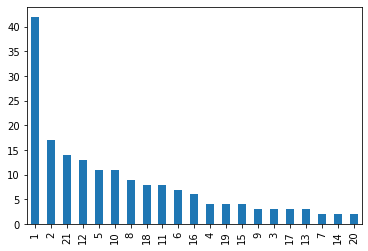

In [438]:
final_df.Label.value_counts().plot(kind='bar')

In [439]:
print(f"Number of rows in the dataset = {final_df.shape[0]}")

num_labels = final_df["Label"].nunique()
print(f"Number of unique labels = {num_labels}")

# Distribution by labels

final_df["Label"].value_counts()

Number of rows in the dataset = 176
Number of unique labels = 21


1     42
2     17
21    14
12    13
5     11
10    11
8      9
18     8
11     8
6      7
16     6
4      4
19     4
15     4
9      3
3      3
17     3
13     3
7      2
14     2
20     2
Name: Label, dtype: int64

In [440]:
#!pip install wordcloud

In [441]:
final_df['Text'] = final_df['Text'].replace('cid', ' ', regex=True)

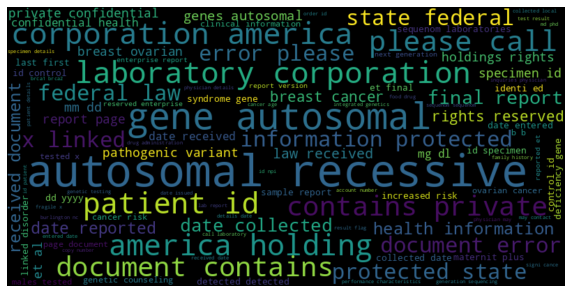

In [442]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black')

# Generate the word cloud from text data
text = ' '.join(final_df['Text'])
wordcloud.generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# CALCULATE TFIDF

In [517]:
#final_tfidf_df = final_df

In [ ]:
'''from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vectorizer.fit(final_df['Text'])

tfidf_matrix = vectorizer.transform(final_df['Text'])

feature_names = vectorizer.get_feature_names()

tfidf_values_list = []

for row in tfidf_matrix:
    row_values = row.toarray()[0].tolist()
    tfidf_values_list.append(row_values)

tfidf_values_list = str(tfidf_values_list)
final_tfidf_df['Tfidf'] = tfidf_values_list
'''

In [519]:
#final_tfidf_df

# SVM

In [447]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [448]:
from sklearn.svm import SVC

vectorizer = CountVectorizer(stop_words='english')

X = final_df['Text']
y = final_df['Label']

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 88)

X_vect = vectorizer.fit_transform(X_train)

svm_classifier = SVC()

svm_classifier.fit(X_vect, y_train)

y_pred = svm_classifier.predict(vectorizer.transform(X_test))


In [449]:
print("Overall Accuracy:",accuracy_score(y_test,y_pred))

#precision
overall_precision = precision_score(y_test, y_pred, average='weighted')
print("Overall Precision:", overall_precision)

# recall
overall_recall = recall_score(y_test, y_pred, average='weighted')
print("Overall Recall:", overall_recall)

# F1 score
overall_f1_score = f1_score(y_test, y_pred, average='weighted')
print("Overall F1 Score:", overall_f1_score)


Overall Accuracy: 0.41509433962264153
Overall Precision: 0.21035728623042957
Overall Recall: 0.41509433962264153
Overall F1 Score: 0.2647405660377358


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [450]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      1.00      0.53        17
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         5

    accuracy              

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


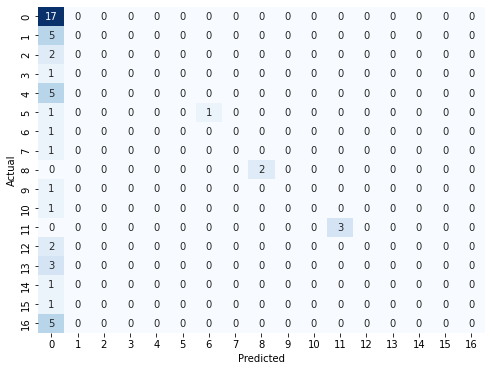

In [451]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# LOGISTIC REGRESSION

In [452]:
from sklearn.linear_model import LogisticRegression

X = final_df['Text']
y = final_df['Label']

X1_train, X1_test, y1_train,y1_test = train_test_split(X, y, test_size=0.3, random_state = 88)

X1_vect = vectorizer.fit_transform(X1_train)

logistic_classifier = LogisticRegression()

logistic_classifier.fit(X1_vect, y1_train)

y1_pred = logistic_classifier.predict(vectorizer.transform(X1_test))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [453]:
print("Overall Accuracy:",accuracy_score(y1_test,y1_pred))

#precision
overall_precision = precision_score(y1_test, y1_pred, average='weighted')
print("Overall Precision:", overall_precision)

# recall
overall_recall = recall_score(y1_test, y1_pred, average='weighted')
print("Overall Recall:", overall_recall)

# F1 score
overall_f1_score = f1_score(y1_test, y1_pred, average='weighted')
print("Overall F1 Score:", overall_f1_score)


Overall Accuracy: 0.8301886792452831
Overall Precision: 0.8681491464510331
Overall Recall: 0.8301886792452831
Overall F1 Score: 0.8307017543859649


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [454]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           1       0.81      1.00      0.89        17
           2       0.75      0.60      0.67         5
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         1
           5       1.00      0.60      0.75         5
           6       0.00      0.00      0.00         0
           8       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       0.00      0.00      0.00         0
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         3
          17       1.00      0.50      0.67         2
          18       1.00      0.67      0.80         3
          19       1.00      1.00      1.00         1
          20       1.00    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


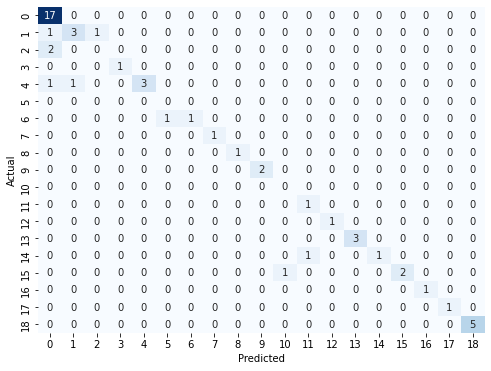

In [455]:
# Compute the confusion matrix
cm = confusion_matrix(y1_test, y1_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# NAIVE BAYES

In [456]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

X = final_df['Text']
y = final_df['Label']

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state = 88)

X2_vect = vectorizer.fit_transform(X2_train)

naive_classifier = MultinomialNB()

naive_classifier.fit(X2_vect, y2_train)

y2_pred = naive_classifier.predict(vectorizer.transform(X2_test))

In [457]:
print("Overall Accuracy:",accuracy_score(y2_test,y2_pred))

#precision
overall_precision = precision_score(y2_test, y2_pred, average='weighted')
print("Overall Precision:", overall_precision)

# recall
overall_recall = recall_score(y2_test, y2_pred, average='weighted')
print("Overall Recall:", overall_recall)

# F1 score
overall_f1_score = f1_score(y2_test, y2_pred, average='weighted')
print("Overall F1 Score:", overall_f1_score)


Overall Accuracy: 0.7358490566037735
Overall Precision: 0.7272686433063791
Overall Recall: 0.7358490566037735
Overall F1 Score: 0.707027001465929


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [458]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           1       0.81      1.00      0.89        17
           2       0.67      0.40      0.50         5
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         1
           5       1.00      0.40      0.57         5
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.20      1.00      0.33         1
          12       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         1
          16       0.75      1.00      0.86         3
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         3
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       1.00    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classif

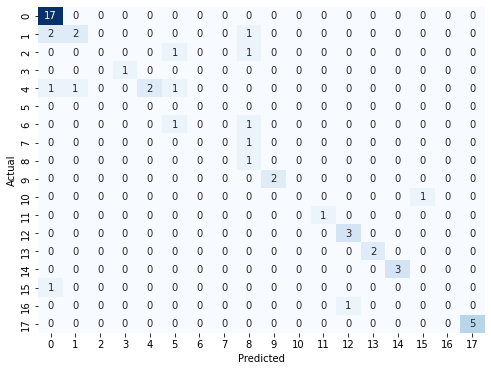

In [459]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y2_test, y2_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# KNN 

In [460]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = final_df['Text']
y = final_df['Label']

X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.3, random_state=88)

X3_vect = vectorizer.fit_transform(X3_train)

# Create a kNN classifier with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X3_vect, y3_train)

# Make predictions on the test set
y3_pred = knn.predict(vectorizer.transform(X3_test))

In [461]:
print("Overall Accuracy:",accuracy_score(y3_test,y3_pred))

#precision
overall_precision = precision_score(y3_test, y3_pred, average='weighted')
print("Overall Precision:", overall_precision)

# recall
overall_recall = recall_score(y3_test, y3_pred, average='weighted')
print("Overall Recall:", overall_recall)

# F1 score
overall_f1_score = f1_score(y3_test, y3_pred, average='weighted')
print("Overall F1 Score:", overall_f1_score)


Overall Accuracy: 0.7547169811320755
Overall Precision: 0.7380503144654087
Overall Recall: 0.7547169811320755
Overall F1 Score: 0.712414816188401


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [462]:
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        17
           2       0.67      0.80      0.73         5
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         1
           5       1.00      0.20      0.33         5
           6       0.00      0.00      0.00         0
           8       0.50      0.50      0.50         2
          10       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         1
          15       0.50      1.00      0.67         1
          16       1.00      1.00      1.00         3
          17       0.00      0.00      0.00         2
          18       1.00      1.00      1.00         3
          19       0.33      1.00      0.50         1
          20       0.00      0.00      0.00         1
          21       1.00    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classif

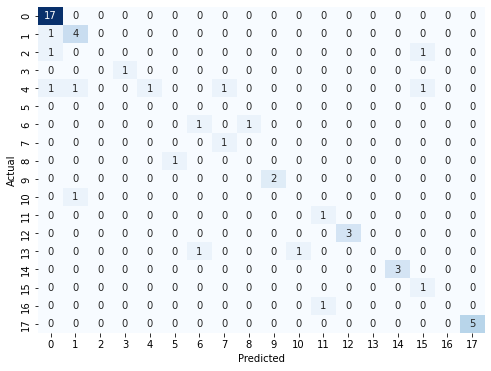

In [463]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y3_test, y3_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# RANDOM FOREST

In [464]:
from sklearn.ensemble import RandomForestClassifier

X = final_df['Text']
y = final_df['Label']

X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.3,random_state=88)

X4_vect = vectorizer.fit_transform(X4_train)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X4_vect, y4_train)

y4_pred = rf_classifier.predict(vectorizer.transform(X4_test))

In [465]:
print("Overall Accuracy:",accuracy_score(y4_test,y4_pred))

#precision
overall_precision = precision_score(y4_test, y4_pred, average='weighted')
print("Overall Precision:", overall_precision)

# recall
overall_recall = recall_score(y4_test, y4_pred, average='weighted')
print("Overall Recall:", overall_recall)

# F1 score
overall_f1_score = f1_score(y4_test, y4_pred, average='weighted')
print("Overall F1 Score:", overall_f1_score)


Overall Accuracy: 0.8301886792452831
Overall Precision: 0.8194858214719187
Overall Recall: 0.8301886792452831
Overall F1 Score: 0.8006888289907158


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [466]:
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        17
           2       0.44      0.80      0.57         5
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         1
           5       1.00      0.40      0.57         5
           8       1.00      0.50      0.67         2
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         3
          17       0.00      0.00      0.00         2
          18       1.00      1.00      1.00         3
          19       0.50      1.00      0.67         1
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         5

    accuracy              

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


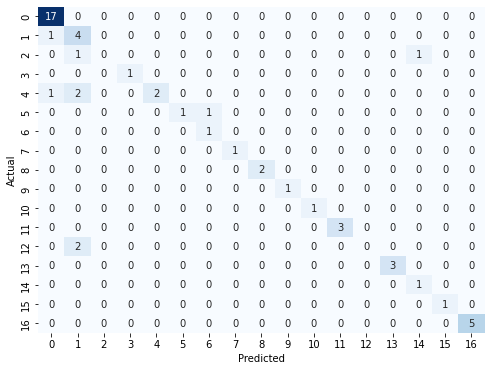

In [467]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y4_test, y4_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [468]:
class_labels = ['OTHER LAB REPORT', 'BLOOD TEST REPORT', 'HAEMATOLOGY REPORT', 'TUMOR MARKER REPORT', 'URINE TEST REPORT', 'COMPREHENSIVE METABOLIC PANEL REPORT', 'C-REACTIVE PROTEIN REPORT', 'DIABETES REPORT', 'GENETIC TESTING REPORT', 'KIDNEY TESTS REPORT', 'LIPID PANEL REPORT', 'BCRASSURE REPORT', 'CHROMOSOME ANALYSIS REPORT', 'FIRST SCREEN REPORT', 'FRAGILE X REPORT', 'INHERITEST REPORT', 'MATERNITY REPORT', 'REVEAL SNP MICROARRAY REPORT', 'SEQUENTIAL SCREEN REPORT', 'SPINAL MUSCULAR ATROPHY SMA REPORT', 'VISTASEQ REPORT']
def find_class_label(label):
    return class_labels[label-1]

# TEST DATA 1

ORIGINAL DATA BELONGS TO CLASS TUMOR MARKER

In [469]:
testdata1_X_test = '2215 Winkler Avenue Suite Fort Myers FL 33901 oe Smaps Panel Test Results Toll Free 1 888 GET LABS RSO NADA Test results provided Quest Tel 239 337 5227 Fax 239 334 6310 Email Specimen Number Patient ID Control Req Account XX123456X 12345678 12345678 12345678 Patient First Name Patient Last Name Medical Directors Comments sample Report You taken first step active participant Patient Phone Age healthcare These results intended informational purposes If 888 438 5227 32 questions concerns regarding results please discuss Date Of Birth Gender Fasting healthcare provider A helpful link understanding results September 11 1984 Male N found Patient Address 2215 Winkler Avenue Fort Myers FL 33901 Collected Received Reported 1 93 2017 1 15 00 PM 1 13 2017 1 1 14 2017 10 33 00 AM Products Ordered Prostate specific Antigen PSA Tests Ordered Prostate specific Antigen PSA Additional Information Sample Report General Comments PSA TOTAL PSA TOTAL 0 9 N OR 4 0 ng mL RGA This test performed using Siemens chemiluminescent method Values obtained different assay methods cannot used interchangeably PSA levels regardless value interpreted absolut evidence presence absence disease Flags H High L Low N Normal O1 RGA Quest Diagnostics Houston Lab 5850 Rogerdale Road Houston TX MD Julia Kenny jone These lab results information They intended diagnosis treatment Please feel free discuss results health care provider'

In [470]:
testdata1_X_test = testdata1_X_test.lower()

In [471]:
testdata1_X_test = [testdata1_X_test]

In [472]:
print(testdata1_X_test)

['2215 winkler avenue suite fort myers fl 33901 oe smaps panel test results toll free 1 888 get labs rso nada test results provided quest tel 239 337 5227 fax 239 334 6310 email specimen number patient id control req account xx123456x 12345678 12345678 12345678 patient first name patient last name medical directors comments sample report you taken first step active participant patient phone age healthcare these results intended informational purposes if 888 438 5227 32 questions concerns regarding results please discuss date of birth gender fasting healthcare provider a helpful link understanding results september 11 1984 male n found patient address 2215 winkler avenue fort myers fl 33901 collected received reported 1 93 2017 1 15 00 pm 1 13 2017 1 1 14 2017 10 33 00 am products ordered prostate specific antigen psa tests ordered prostate specific antigen psa additional information sample report general comments psa total psa total 0 9 n or 4 0 ng ml rga this test performed using siem

In [473]:
#SVM
testdata1_pred = svm_classifier.predict(vectorizer.transform(testdata1_X_test))
print(find_class_label(testdata1_pred[0]))

OTHER LAB REPORT


In [474]:
# KNN
testdata1_pred = knn.predict(vectorizer.transform(testdata1_X_test))
print(find_class_label(testdata1_pred[0]))


BLOOD TEST REPORT


In [475]:
# LOGISTIC
testdata1_pred = logistic_classifier.predict(vectorizer.transform(testdata1_X_test))
print(find_class_label(testdata1_pred[0]))

TUMOR MARKER REPORT


In [476]:
# NAIVE BAYES
testdata1_pred = naive_classifier.predict(vectorizer.transform(testdata1_X_test))
print(find_class_label(testdata1_pred[0]))

BLOOD TEST REPORT


In [477]:
# RANDOM FOREST
testdata1_pred = rf_classifier.predict(vectorizer.transform(testdata1_X_test))
print(find_class_label(testdata1_pred[0]))

TUMOR MARKER REPORT


# TEST DATA 2 

THE ORIGINAL DATA BELONGS TO CLASS OTHER LAB REPORTS

In [478]:
testdata2_X_test = 'A S O TITRE IN PATIENT S SERUMPATIENT NAME MR KETAN CHAVAN Male CRYSTAL LAB 5 29 Years REF BY DR LAB NO SEXDATE SAMPLE COLL AT12 Aug 2011 DR PATIL M B B S AGE NORMAL VALUES RESULT TEST Result Negative TITRE 1 8 Method Immuno Turbidometry End Report Dr Pankaj Shah M D M B B S Chandan Vartak D M L T Highlighted Result Values Indicate Abnormal Report Printed By My Lab'

In [479]:
testdata2_X_test = testdata2_X_test.lower()

In [480]:
testdata2_X_test = [testdata2_X_test]

In [481]:
print(testdata2_X_test)

['a s o titre in patient s serumpatient name mr ketan chavan male crystal lab 5 29 years ref by dr lab no sexdate sample coll at12 aug 2011 dr patil m b b s age normal values result test result negative titre 1 8 method immuno turbidometry end report dr pankaj shah m d m b b s chandan vartak d m l t highlighted result values indicate abnormal report printed by my lab']


In [482]:
# SVM
testdata2_pred = svm_classifier.predict(vectorizer.transform(testdata2_X_test))
print(find_class_label(testdata1_pred[0]))

TUMOR MARKER REPORT


In [483]:
# KNN
testdata2_pred = knn.predict(vectorizer.transform(testdata2_X_test))
print(find_class_label(testdata2_pred[0]))

OTHER LAB REPORT


In [484]:
# LOGISTIC
testdata2_pred = logistic_classifier.predict(vectorizer.transform(testdata2_X_test))
print(find_class_label(testdata2_pred[0]))

OTHER LAB REPORT


In [485]:
# NAIVE BAYES
testdata2_pred = naive_classifier.predict(vectorizer.transform(testdata2_X_test))
print(find_class_label(testdata2_pred[0]))

OTHER LAB REPORT


In [486]:
# RANDOM FOREST
testdata2_pred = rf_classifier.predict(vectorizer.transform(testdata2_X_test))
print(find_class_label(testdata2_pred[0]))

OTHER LAB REPORT


# TEST DATA 3

THE ORIGINAL DATA BELONGS TO DIABETES REPORTS

In [487]:
from pdfminer.high_level import extract_text

def extract_text_from_pdf(file_path):
    text = extract_text(file_path)
    return text

pdf_file = 'testdata3.pdf'
testdata3_X_test = extract_text_from_pdf(pdf_file)
#print(testdata3_X_test)


In [488]:
testdata3_X_test = testdata3_X_test.replace('\n', ' ').replace('\r', ' ')

In [489]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = testdata3_X_test 
data1 = []
data1.extend([8] * 1)

td3_df = pd.DataFrame(columns=['Label', 'Text'])
td3_df['Label'] = data1
td3_df['Text'] = data2


In [490]:
td3_df['Text'] = td3_df['Text'].apply(lambda x: x.lower())

In [491]:
td3_df['Text']  = td3_df['Text'] .apply(email)

In [492]:
td3_df['Text']  = td3_df['Text'] .apply(url)

In [493]:
td3_df['Text']  = td3_df['Text'] .apply(sc)

In [494]:
td3_df['Text']  = td3_df['Text'] .apply(sw)

In [495]:
testdata3_X_test = [testdata3_X_test]

In [496]:
# SVM
testdata3_pred = svm_classifier.predict(vectorizer.transform(testdata3_X_test))
print(find_class_label(testdata3_pred[0]))

OTHER LAB REPORT


In [497]:
# KNN
testdata3_pred = knn.predict(vectorizer.transform(testdata3_X_test))
print(find_class_label(testdata3_pred[0]))

DIABETES REPORT


In [498]:
# LOGISTIC
testdata3_pred = logistic_classifier.predict(vectorizer.transform(testdata3_X_test))
print(find_class_label(testdata3_pred[0]))

DIABETES REPORT


In [499]:
# NAIVE BAYES
testdata3_pred = naive_classifier.predict(vectorizer.transform(testdata3_X_test))
print(find_class_label(testdata3_pred[0]))

LIPID PANEL REPORT


In [500]:
# RANDOM FOREST
testdata3_pred = rf_classifier.predict(vectorizer.transform(testdata3_X_test))
print(find_class_label(testdata3_pred[0]))

DIABETES REPORT


# TEST DATA 4 

THE ORIGINAL DATA BELONGS TO BLOOD TEST REPORTS

In [501]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from PIL import Image
import pytesseract
import numpy as np

image_path = 'testdata4.jpg'
testdata4_X_test = []
image = Image.open(image_path)
text = pytesseract.image_to_string(image)
testdata4_X_test.append(text)

print(testdata4_X_test)

['2215 Winkler Avenue, Suite |\nFort Myers, FL 33901\n\nJ\nBrevreriaon Panel Test Results Toll Free: 1 888 GET LABS\nPERSONAIABS (Fei keslbe preioired by Cin Tek-239 337 5227 Fax 239 334 6310\n\nEmail: info@personalabs.com\n\nSpecimen Number: Patient ID: Control/Req. # Account #\n\nXX123456X 12345678 12345678 12345678\n\nPatient First Name: Patient Last Name: Medical Directors Comments\n\nsample Report You have now taken the first step to being an active participant in your\nPatient Phone: Age: healthcare. These results are intended for informational purposes only. As you\n888-438-5227 32 review your results you will see that you have results that are outside the normal\nDate Of Birth: Gender: Fasting: range. These results should be reviewed and discussed with your healthcare\nSeptember 11, 1984 Male N provider in order to better understand how they relate to your particular\nPatient Address: situation or medical condition. A helpful link to understanding your test results\n2215 Winkle

In [502]:
testdata4_X_test = [string.replace(r'\r\n|\n|\r', ' ') for string in testdata4_X_test]

In [503]:
#ADD DATA TO DATAFRAME

import pandas as pd

data2 = testdata4_X_test 
data1 = []
data1.extend([2] * 1)

rd_df = pd.DataFrame(columns=['Label', 'Text'])
rd_df['Label'] = data1
rd_df['Text'] = data2


In [504]:
rd_df

,Label,Text
0,2,"2215 Winkler Avenue, Suite |\nFort Myers, FL 3..."


In [505]:
rd_df['Text'] = rd_df['Text'].apply(lambda x: x.lower())

In [506]:
rd_df['Text']  = rd_df['Text'] .apply(email)

In [507]:
rd_df['Text']  = rd_df['Text'] .apply(url)

In [508]:
rd_df['Text']  = rd_df['Text'] .apply(sc)

In [509]:
rd_df['Text']  = rd_df['Text'] .apply(sw)

In [510]:
testdata4_X_test = rd_df['Text'][0]

In [511]:
testdata4_X_test = [testdata4_X_test]

In [512]:
# SVM
testdata4_pred = svm_classifier.predict(vectorizer.transform(testdata4_X_test))
print(find_class_label(testdata4_pred[0]))

OTHER LAB REPORT


In [513]:
# KNN
testdata4_pred = knn.predict(vectorizer.transform(testdata4_X_test))
print(find_class_label(testdata4_pred[0]))

BLOOD TEST REPORT


In [514]:
testdata4_pred = logistic_classifier.predict(vectorizer.transform(testdata4_X_test))
print(find_class_label(testdata4_pred[0]))

BLOOD TEST REPORT


In [515]:
# SVM
testdata4_pred = naive_classifier.predict(vectorizer.transform(testdata4_X_test))
print(find_class_label(testdata4_pred[0]))

BLOOD TEST REPORT


In [516]:
# SVM
testdata4_pred = rf_classifier.predict(vectorizer.transform(testdata4_X_test))
print(find_class_label(testdata4_pred[0]))

BLOOD TEST REPORT
